Epoch 1/200


C:\Users\vilar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 12607.7070 - mae: 112.1659 - val_loss: 11894.7686 - val_mae: 108.9771
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11490.7910 - mae: 107.0877 - val_loss: 10853.0264 - val_mae: 104.0958
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10524.7695 - mae: 102.4927 - val_loss: 9894.9062 - val_mae: 99.3950
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9608.9375 - mae: 97.9227 - val_loss: 9019.7236 - val_mae: 94.8978
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8695.6914 - mae: 93.1650 - val_loss: 8223.2354 - val_mae: 90.6112
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7946.0200 - mae: 89.0513 - val_loss: 7499.5557 - val_mae: 86.5325
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7232.9019 - mae: 84.9704 - val_loss: 6842.8726 - val_mae: 82.6573
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6625.2495 - mae: 81.3191 - val_loss: 6247.0293 - val_mae: 78.9769
E

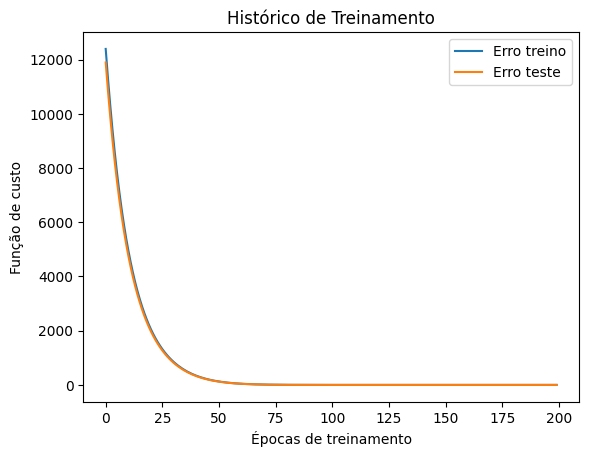

In [3]:
import pandas as pd
 
df = pd.read_csv('assets/admission_dataset.csv')
 
y = df['Chance of Admit ']
x = df.drop('Chance of Admit ', axis = 1)
 
x_treino, x_teste = x[0:300], x[300:]
y_treino, y_teste = y[0:300], y[300:]
 
from keras.models import Sequential
from keras.layers import Dense
 
modelo = Sequential()
modelo.add(Dense(units=3, activation='relu', input_dim=x_treino.shape[1]))
modelo.add(Dense(units=1, activation='linear'))
 
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
 
resultado = modelo.fit(x_treino,y_treino, epochs=200, batch_size=32, validation_data=(x_teste, y_teste))
 
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()